# generate-plot-w-new-TMT
2.24.23

Want to add the output dataframe from this new TMT dataset, PXD007683, to the output
from all the others, so that I can avoid repeating the traditional-eval experiment for every single dataset. 

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator

# plotting templates
sns.set(context="talk", style="ticks") 
sns.set_palette("tab10")

#### Read in the old MNAR dataframe

In [2]:
# read in 
recon_err_mnar = pd.read_csv("../output/recon-errors-MNAR-plus-TMT1.csv")

# switch up the column names
recon_err_mnar.columns = ["PXD", "NMF", "KNN", "Sample Min", "Gaussian Sample", "missForest"]

# rename the CPTAC columns
recon_err_mnar.loc[2, "PXD"] = "CPTAC-S051"
recon_err_mnar.loc[3, "PXD"] = "CPTAC-S047"

recon_err_mnar

,PXD,NMF,KNN,Sample Min,Gaussian Sample,missForest
0,PXD013792,1.843787e+13,1.990279e+13,1.950205e+12,1.956934e+12,4.821344e+12
1,PXD014156,1.223616e+14,5.940383e+13,1.108756e+13,1.109708e+13,2.388355e+13
2,CPTAC-S051,6.961915e+10,8.522172e+09,2.413804e+10,2.413836e+10,8.652868e+09
3,CPTAC-S047,1.118163e+11,4.725364e+10,1.831532e+10,1.831723e+10,9.513177e+10
4,PXD006348,1.215052e+14,1.999289e+13,1.596292e+13,1.596731e+13,7.097195e+13
5,PXD011961,4.162461e+14,7.110442e+13,9.464265e+13,9.464725e+13,5.506507e+13
6,PXD014525,8.555477e+14,2.199836e+14,3.288885e+14,3.285561e+14,2.800892e+14


#### Read in the new TMT MNAR dataframe
For PXD007683

In [3]:
# read in 
new_tmt_mnar = pd.read_csv("../output/recon-errors-MNAR-PXD007683.csv")

# switch up the column names
new_tmt_mnar.columns = \
        ["PXD", "NMF", "KNN", "Sample Min", 
         "Gaussian Sample", "missForest"]

new_tmt_mnar

,PXD,NMF,KNN,Sample Min,Gaussian Sample,missForest
0,PXD007683,234.177946,63.976573,3231.069829,3225.614259,42.891547


#### Add the new TMT MNAR dataframe onto the old one

In [4]:
recon_err_mnar = recon_err_mnar.append(new_tmt_mnar, ignore_index=True)
recon_err_mnar

,PXD,NMF,KNN,Sample Min,Gaussian Sample,missForest
0,PXD013792,1.843787e+13,1.990279e+13,1.950205e+12,1.956934e+12,4.821344e+12
1,PXD014156,1.223616e+14,5.940383e+13,1.108756e+13,1.109708e+13,2.388355e+13
2,CPTAC-S051,6.961915e+10,8.522172e+09,2.413804e+10,2.413836e+10,8.652868e+09
3,CPTAC-S047,1.118163e+11,4.725364e+10,1.831532e+10,1.831723e+10,9.513177e+10
4,PXD006348,1.215052e+14,1.999289e+13,1.596292e+13,1.596731e+13,7.097195e+13
5,PXD011961,4.162461e+14,7.110442e+13,9.464265e+13,9.464725e+13,5.506507e+13
6,PXD014525,8.555477e+14,2.199836e+14,3.288885e+14,3.285561e+14,2.800892e+14
7,PXD007683,2.341779e+02,6.397657e+01,3.231070e+03,3.225614e+03,4.289155e+01


#### Melt

In [5]:
# melt
recon_mnar_melted = recon_err_mnar.melt(id_vars="PXD")
recon_mnar_melted.columns = ["PXD", "Method", "MSE"]
# recon_mnar_melted

# get logged MSE
log_mse = np.log(recon_mnar_melted["MSE"])
recon_mnar_melted["Log MSE"] = log_mse

#### Generate barplot

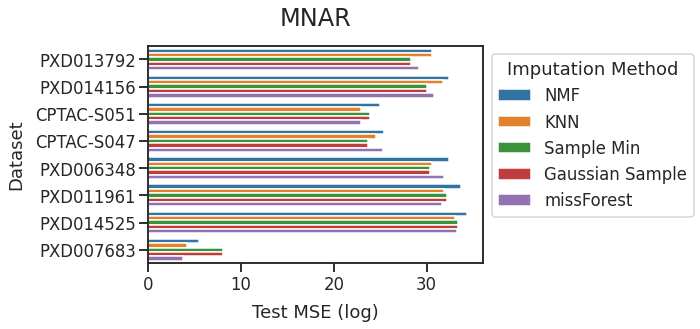

In [6]:
sns.set_palette("tab10")

sns.barplot(data=recon_mnar_melted, x="Log MSE", y="PXD", hue="Method")
plt.title("MNAR", pad=20, size=24)

plt.xlabel("Test MSE (log)", labelpad=10)
plt.ylabel("Dataset", labelpad=10)
plt.xlim(0)

plt.legend(bbox_to_anchor=(1.0, 1.0), title="Imputation Method")

***

## Do the same thing with the MCAR experiment

#### Read in the old MCAR dataframe

In [7]:
# read in 
recon_err_mcar = pd.read_csv("../output/recon-errors-MCAR-plus-TMT1.csv")

# switch up the column names
recon_err_mcar.columns = ["PXD", "NMF", "KNN", "Sample Min", "Gaussian Sample", "missForest"]

# rename the CPTAC columns
recon_err_mcar.loc[2, "PXD"] = "CPTAC-S051"
recon_err_mcar.loc[3, "PXD"] = "CPTAC-S047"

recon_err_mcar

,PXD,NMF,KNN,Sample Min,Gaussian Sample,missForest
0,PXD013792,1.066015e+14,1.795971e+14,1.805838e+14,1.806179e+14,9.359602e+13
1,PXD014156,4.760811e+14,5.078904e+14,5.785268e+14,5.785646e+14,5.805254e+14
2,CPTAC-S051,6.331097e+11,1.999282e+12,3.005091e+12,3.005094e+12,6.090703e+11
3,CPTAC-S047,1.655514e+12,2.414386e+12,2.896706e+12,2.896712e+12,1.223207e+12
4,PXD006348,4.330552e+14,1.047088e+15,1.302947e+15,1.303076e+15,3.787196e+14
5,PXD011961,2.782075e+15,8.345131e+15,1.009016e+16,1.009024e+16,1.923708e+15
6,PXD014525,5.599170e+15,1.120837e+16,1.921844e+16,1.921845e+16,2.377150e+15


#### Read in the new TMT MCAR output dataframe

In [8]:
# read in 
new_tmt_mcar = pd.read_csv("../output/recon-errors-MCAR-PXD007683.csv")

# switch up the column names
new_tmt_mcar.columns = \
        ["PXD", "NMF", "KNN", "Sample Min", 
         "Gaussian Sample", "missForest"]

new_tmt_mcar

,PXD,NMF,KNN,Sample Min,Gaussian Sample,missForest
0,PXD007683,661.418063,715.913335,27787.63946,27778.577134,183.267211


#### Add the new TMT dataframe to the old one

In [9]:
recon_err_mcar = recon_err_mcar.append(new_tmt_mcar, ignore_index=True)
recon_err_mcar

,PXD,NMF,KNN,Sample Min,Gaussian Sample,missForest
0,PXD013792,1.066015e+14,1.795971e+14,1.805838e+14,1.806179e+14,9.359602e+13
1,PXD014156,4.760811e+14,5.078904e+14,5.785268e+14,5.785646e+14,5.805254e+14
2,CPTAC-S051,6.331097e+11,1.999282e+12,3.005091e+12,3.005094e+12,6.090703e+11
3,CPTAC-S047,1.655514e+12,2.414386e+12,2.896706e+12,2.896712e+12,1.223207e+12
4,PXD006348,4.330552e+14,1.047088e+15,1.302947e+15,1.303076e+15,3.787196e+14
5,PXD011961,2.782075e+15,8.345131e+15,1.009016e+16,1.009024e+16,1.923708e+15
6,PXD014525,5.599170e+15,1.120837e+16,1.921844e+16,1.921845e+16,2.377150e+15
7,PXD007683,6.614181e+02,7.159133e+02,2.778764e+04,2.777858e+04,1.832672e+02


In [10]:
# melt
recon_mcar_melted = recon_err_mcar.melt(id_vars="PXD")
recon_mcar_melted.columns = ["PXD", "Method", "MSE"]
# recon_mcar_melted

# get logged MSE
log_mse = np.log(recon_mcar_melted["MSE"])
recon_mcar_melted["Log MSE"] = log_mse

#### Generate barplot

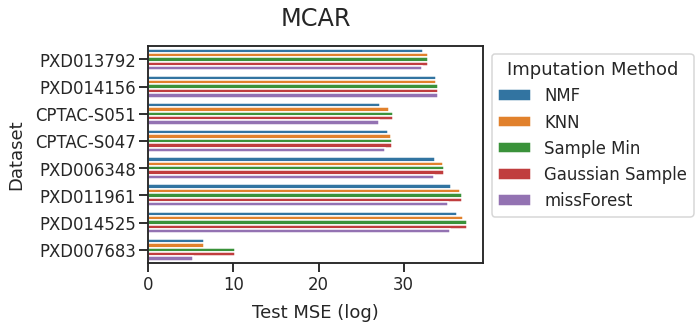

In [11]:
sns.set_palette("tab10")

sns.barplot(data=recon_mcar_melted, x="Log MSE", y="PXD", hue="Method")
plt.title("MCAR", pad=20, size=24)

plt.xlabel("Test MSE (log)", labelpad=10)
plt.ylabel("Dataset", labelpad=10)
plt.xlim(0)

plt.legend(bbox_to_anchor=(1.0, 1.0), title="Imputation Method")

#### Plot both side-by-side

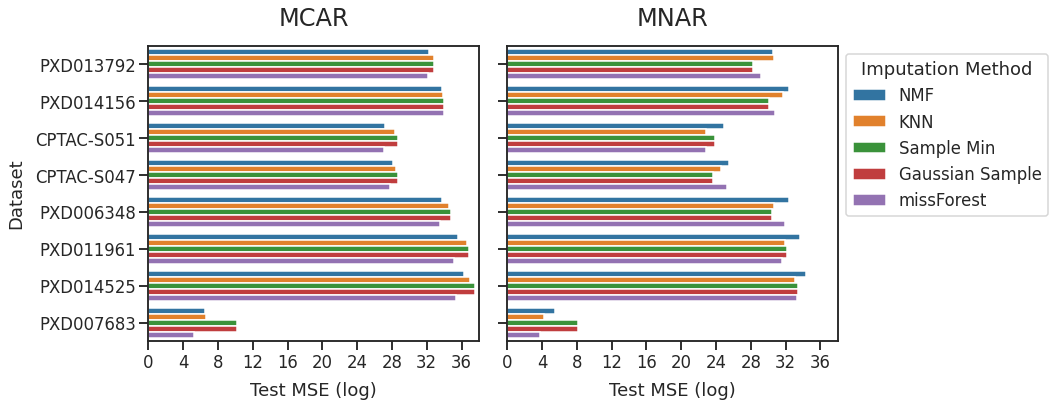

In [14]:
sns.set_palette("tab10")

fig, axes = plt.subplots(nrows=1, ncols=2, sharey=True, sharex=True, figsize=(15,6))

sns.barplot(data=recon_mcar_melted, x="Log MSE", y="PXD", hue="Method", ax=axes[0])
axes[0].set_title("MCAR", pad=20, size=24)
axes[0].get_legend().remove()
axes[0].set_xlabel("Test MSE (log)", labelpad=10)
axes[0].set_ylabel("Dataset", labelpad=10)
axes[0].set_xlim(0)
axes[0].xaxis.set_major_locator(MaxNLocator(integer=True))

sns.barplot(data=recon_mnar_melted, x="Log MSE", y="PXD", hue="Method", ax=axes[1])
axes[1].set_title("MNAR", pad=20, size=24)
axes[1].legend(bbox_to_anchor=(1.0, 1.0), title="Imputation Method")
axes[1].set_xlabel("Test MSE (log)", labelpad=10)
axes[1].set_ylabel("", labelpad=10)
axes[1].set_xlim(0, 38)

fig.tight_layout()
#plt.savefig("../figures/traditional-barplots-plus-TMT-new.png", dpi=250, bbox_inches="tight")